In [1]:
!pip install scikit-learn pandas numpy


In [2]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load movies dataset
movies = pd.read_csv("/content/movies.csv")  # Adjust path if needed

# Display first few rows
movies.head()


,Unnamed: 0,id,title,overview,release_date,popularity,vote_average,vote_count
0,0,278,The Shawshank Redemption,Imprisoned in the 1940s for the double murder ...,1994-09-23,161.704,8.708,27821
1,1,238,The Godfather,"Spanning the years 1945 to 1955, a chronicle o...",1972-03-14,166.401,8.689,21116
2,2,240,The Godfather Part II,In the continuing saga of the Corleone crime f...,1974-12-20,84.446,8.570,12746
3,3,424,Schindler's List,The true story of how businessman Oskar Schind...,1993-12-15,77.562,8.567,16192
4,4,389,12 Angry Men,The defense and the prosecution have rested an...,1957-04-10,60.237,8.500,8935


In [4]:
# TF-IDF Vectorization for Movie Descriptions
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['overview'].fillna(""))

# Compute similarity matrix
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Function to recommend movies based on title
def recommend_movies(title, num_recommendations=5):
    # Get index of the movie
    if title not in movies['title'].values:
        return "Movie not found! Try another title."

    idx = movies[movies['title'] == title].index[0]

    # Get similarity scores
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

    # Get top recommended movie indices
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Return recommended movie titles
    return movies['title'].iloc[movie_indices].tolist()

# Example usage
recommend_movies("Inception")


['Inception',
 'New World',
 'New World',
 'Inception: The Cobol Job',
 'Inception: The Cobol Job']

In [5]:
movie_name = input("Enter a movie title: ")
print("Recommended Movies:", recommend_movies(movie_name))


Enter a movie title: The Legend of Hei
Recommended Movies: ['The Legend of Hei', 'My Neighbor Totoro', 'My Neighbor Totoro', 'The Unborn', 'The Unborn']


In [6]:
!pip install scikit-learn pandas numpy seaborn matplotlib networkx


In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Load dataset
movies = pd.read_csv("/content/movies.csv")

# Check available columns
print(movies.columns)

# Use the correct column (e.g., 'overview' instead of 'description')
vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = vectorizer.fit_transform(movies['overview'].fillna(""))

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)


Index(['Unnamed: 0', 'id', 'title', 'overview', 'release_date', 'popularity',
       'vote_average', 'vote_count'],
      dtype='object')


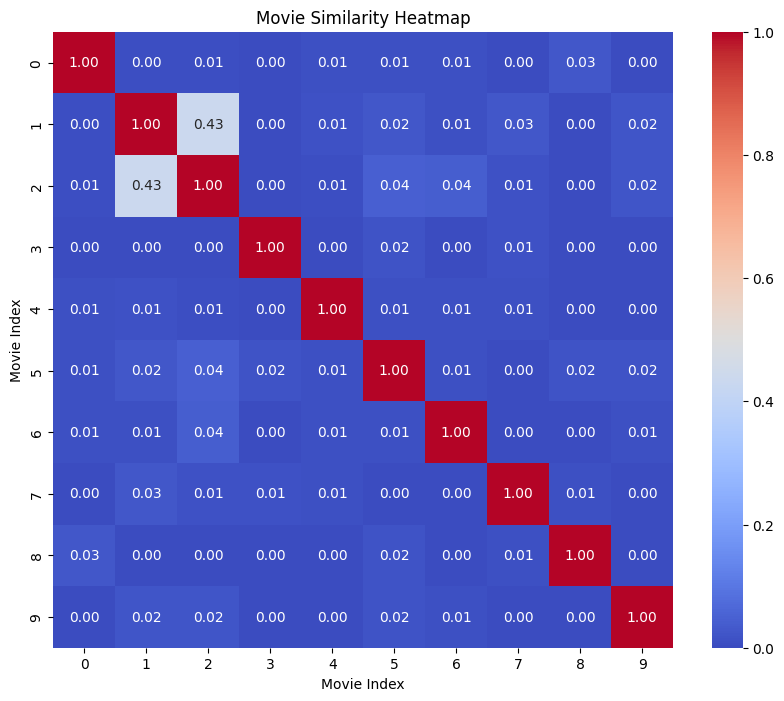

In [8]:
plt.figure(figsize=(10,8))
sns.heatmap(cosine_sim[:10, :10], cmap="coolwarm", annot=True, fmt=".2f")  # Only first 10 movies for readability
plt.title("Movie Similarity Heatmap")
plt.xlabel("Movie Index")
plt.ylabel("Movie Index")
plt.show()


<ipython-input-9-d80c2dfa7624>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=similarity_scores, y=recommended_movies, palette="viridis")


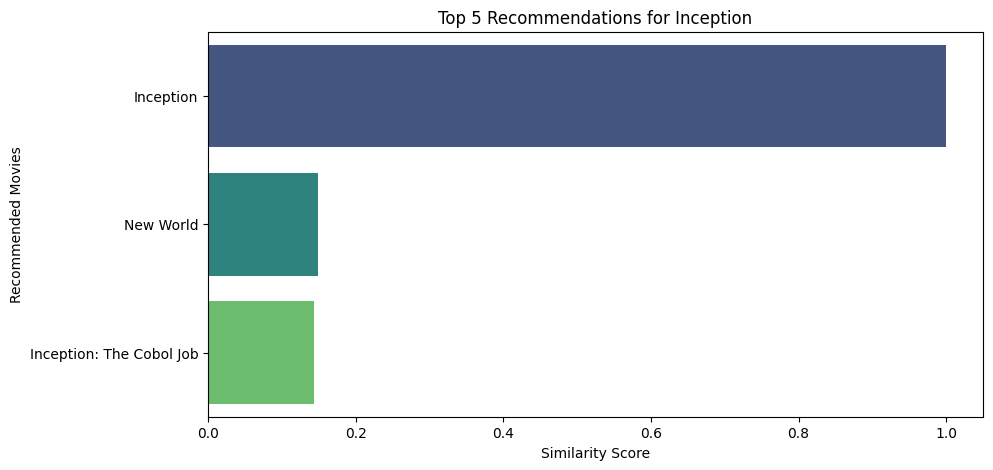

In [9]:
def plot_top_recommendations(title, num_recommendations=5):
    if title not in movies['title'].values:
        print("Movie not found! Try another title.")
        return

    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    recommended_movies = movies['title'].iloc[movie_indices]
    similarity_scores = [sim_scores[i+1][1] for i in range(num_recommendations)]

    # Plot
    plt.figure(figsize=(10,5))
    sns.barplot(x=similarity_scores, y=recommended_movies, palette="viridis")
    plt.xlabel("Similarity Score")
    plt.ylabel("Recommended Movies")
    plt.title(f"Top {num_recommendations} Recommendations for {title}")
    plt.show()

# Example Usage
plot_top_recommendations("Inception")


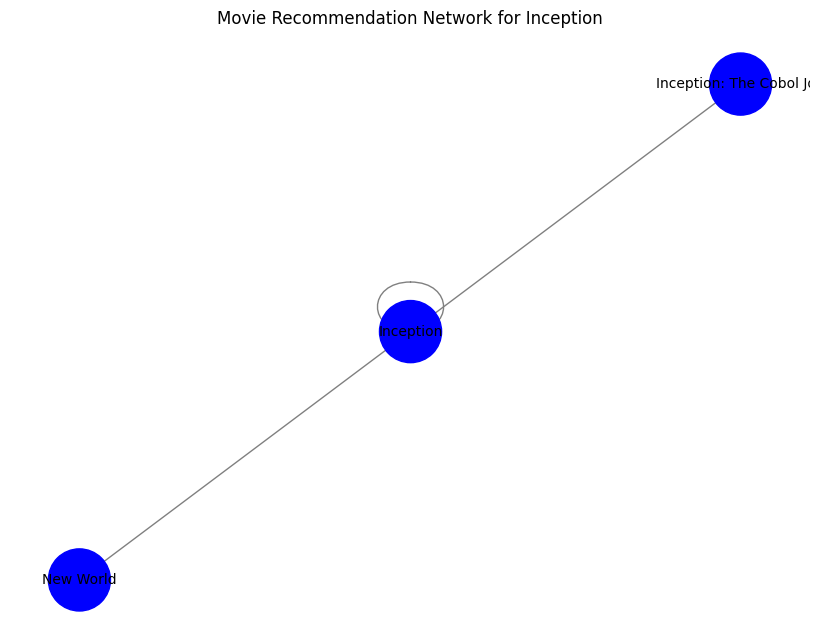

In [10]:
def plot_movie_network(title, num_recommendations=5):
    if title not in movies['title'].values:
        print("Movie not found! Try another title.")
        return

    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    movie_indices = [i[0] for i in sim_scores[1:num_recommendations+1]]

    # Create Graph
    G = nx.Graph()
    G.add_node(title, color='red')

    for i in movie_indices:
        G.add_node(movies['title'][i], color='blue')
        G.add_edge(title, movies['title'][i])

    # Draw Graph
    plt.figure(figsize=(8, 6))
    pos = nx.spring_layout(G)
    colors = [G.nodes[n]['color'] for n in G.nodes()]
    nx.draw(G, pos, with_labels=True, node_color=colors, edge_color='gray', font_size=10, node_size=2000)
    plt.title(f"Movie Recommendation Network for {title}")
    plt.show()

# Example Usage
plot_movie_network("Inception")
